In [1]:
# pip install version_information
%load_ext version_information
%reload_ext version_information
%version_information numpy, scipy, matplotlib, pandas, seaborn

Software versions
Python 3.6.2 64bit [GCC 7.2.0]
IPython 6.1.0
OS Linux 4.13.0 38 generic x86_64 with debian stretch sid
numpy 1.13.1
scipy 0.19.1
matplotlib 2.0.2
pandas 0.20.3
seaborn 0.8.0
Wed Apr 18 14:55:37 2018 CEST

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# http://paletton.com/#uid=73v1B0kJoJQguPzq1KZJGpQNUfN
dpcolors = type('', (), {})()

dpcolors.dp_blue_0 = "#077FCE"
dpcolors.dp_blue_1 = "#73B4DE"
dpcolors.dp_blue_2 = "#3192D1"
dpcolors.dp_blue_3 = "#045184"
dpcolors.dp_blue_4 = "#023250"

dpcolors.dp_pink_0 = "#DF0096"
dpcolors.dp_pink_1 = "#E971C2"
dpcolors.dp_pink_2 = "#E12AA5"
dpcolors.dp_pink_3 = "#9D006A"
dpcolors.dp_pink_4 = "#600041"

dpcolors.dp_green_0 = "#B3F700"
dpcolors.dp_green_1 = "#D6FA79"
dpcolors.dp_green_2 = "#C0F82E"
dpcolors.dp_green_3 = "#8DC200"
dpcolors.dp_green_4 = "#567700"

dpcolors.dp_orange_0 = "#FF8E00"
dpcolors.dp_orange_1 = "#FFC57C"
dpcolors.dp_orange_2 = "#FFA330"
dpcolors.dp_orange_3 = "#CE7300"
dpcolors.dp_orange_4 = "#7E4600"
viridis = plt.get_cmap('viridis')

In [3]:
csv = pd.read_csv("result.csv")

In [28]:
csv[csv["heapSize_GB"]==32]


,allocationRate_MBs,heapSize_GB,maxPauseTarget,maxResponseTime,meanResponseTime_ms,standardDeviation_ms,95pt,98pt,99pt,99.9pt,99.99pt,gcTotalPause,gcMeanPause,gcMaxPause,gc95,gc99,gc99.9,gc99.99
23,1500,32,300,2823,22,94,137,399,1259,2040,55.304629,0.077784,0.432383,0.296464,0.329151,0.418420,0.430987,NaN
28,1500,32,500,4638,36,164,225,686,2283,2881,52.520202,0.081427,0.504065,0.401661,0.455723,0.490039,0.502663,NaN
30,1500,32,400,2504,30,115,217,552,1192,1772,53.556287,0.083291,0.442873,0.377250,0.428287,0.442012,0.442787,NaN
52,1500,32,600,4320,42,171,311,739,2343,3537,53.658277,0.087108,0.515172,0.443203,0.484036,0.511070,0.514761,NaN
61,1500,32,100,1182,12,35,77,164,298,858,66.655382,0.061947,0.188941,0.121799,0.168640,0.187062,0.188770,NaN
81,1500,32,200,680,14,43,86,248,340,426,57.539191,0.071566,0.289528,0.208559,0.232589,0.270841,0.287660,NaN


In [5]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import warnings

In [6]:

# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

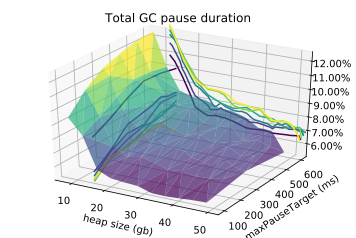

In [32]:
colanalysis = "gcTotalPause"
title = 'Total GC pause duration'
#title = 'Client latency - %s percentile (ms)' % colanalysis
#colanalysis = "95pt"
df = csv[["heapSize_GB", "maxPauseTarget", colanalysis]]
df = df[np.logical_not(np.isnan(df[colanalysis]))]
df = df.sort_values(by=["heapSize_GB", "maxPauseTarget"])
df = df[df["heapSize_GB"] >= 7]
warnings.filterwarnings("ignore")
fig = plt.figure()
ax = fig.gca(projection='3d')
X = df["heapSize_GB"]
Y = df["maxPauseTarget"]
Z = df[colanalysis]
surf = ax.plot_trisurf(X, Y, Z, alpha=0.70, cmap='viridis', edgecolor='none')
ax.set_xlabel('heap size (gb)')
ax.set_ylabel('maxPauseTarget (ms)')
#ax.set_zlabel('Client latency - 95 percentile (MS)')

vals = ax.get_zticks()
ax.set_zticklabels(['{:3.2f}%'.format(x*100) for x in vals])

ax.set_title(title)

cset = ax.tricontour(X, Y, Z, zdir='x', offset=15, cmap='viridis')
cset = ax.tricontour(X, Y, Z, zdir='y', offset=700, cmap='viridis')

In [8]:
def f(x, y, a, b, c, d):
    return (exp(-a*x)+b)*(c*y+d)

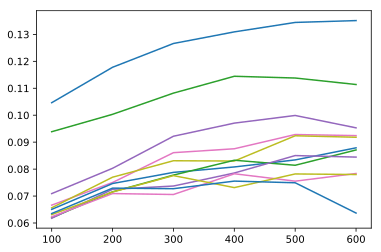

In [9]:
flat = csv[["heapSize_GB", "maxPauseTarget", colanalysis]]
flat = flat.sort_values(by=["heapSize_GB", "maxPauseTarget"])
uniqval_x = np.unique(csv["heapSize_GB"].values)

for val in uniqval_x:
    cur = flat[flat["heapSize_GB"] == val]
    plt.plot(cur["maxPauseTarget"].values, cur[colanalysis].values)

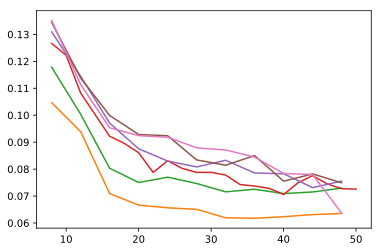

In [10]:
uniqval_y = np.unique(csv["maxPauseTarget"].values)

for val in uniqval_y:
    cur = flat[flat["maxPauseTarget"] == val]
    plt.plot(cur["heapSize_GB"].values, cur[colanalysis].values)